In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [47]:
data=pd.read_csv("income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [54]:
scaler=StandardScaler()


In [55]:
data["Age"]=scaler.fit_transform(data[["Age"]])
data["Income($)"]=scaler.fit_transform(data[["Income($)"]])

In [57]:
X=data.iloc[:,[1,2]].values
X

array([[-1.35605536, -0.48068427],
       [-1.00915747, -0.01015907],
       [-1.00915747, -0.69242061],
       [-1.18260641, -0.71594687],
       [ 1.24567876,  1.40141653],
       [ 0.72533193,  1.51904783],
       [ 1.07222982,  1.63667914],
       [ 0.55188299,  1.68373166],
       [ 0.20498511,  1.54257409],
       [ 0.03153617,  0.93089133],
       [ 0.37843405,  1.09557515],
       [-1.5295043 , -1.06884077],
       [-1.35605536, -0.99826199],
       [-1.18260641, -0.92768321],
       [-1.00915747, -0.9629726 ],
       [-0.48881065, -0.88063069],
       [ 0.89878087, -0.59831557],
       [ 1.07222982, -0.64536809],
       [ 1.4191277 , -0.62184183],
       [ 0.72533193, -0.24542167],
       [ 1.07222982, -0.19836915],
       [ 0.72533193, -0.76299939]])

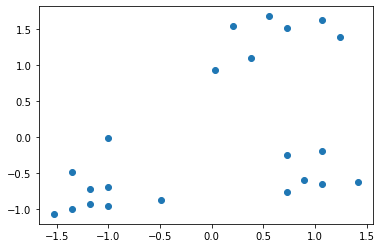

In [58]:
plt.scatter(data["Age"],data["Income($)"])

In [59]:
from sklearn.cluster import KMeans


In [60]:
wcss=[]
for i in range(1,11):
    kmc=KMeans(n_clusters=i)
    kmc.fit(X)
    wcss.append(kmc.inertia_)
    
wcss    

C:\Users\Sathwik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[43.99999999999999,
 16.194890274706772,
 3.8893086571301416,
 2.8287633800935246,
 2.3076470575312893,
 1.7212063327069065,
 1.41746375468952,
 1.103103775556412,
 0.8983727091879568,
 0.664070501620059]

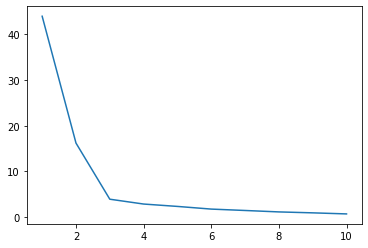

In [61]:
plt.plot(range(1,11),wcss)
plt.show()

In [62]:
fkmc=KMeans(n_clusters=3)
fkmc.fit(X)

KMeans(n_clusters=3)

In [63]:
y_kmeans=fkmc.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

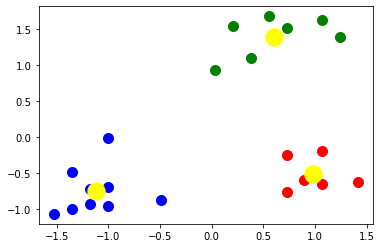

In [66]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(fkmc.cluster_centers_[:,0],fkmc.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

In [74]:

data["clusters"]=y_kmeans
data.head()

,Name,Age,Income($),clusters
0,Rob,-1.356055,-0.480684,1
1,Michael,-1.009157,-0.010159,1
2,Mohan,-1.009157,-0.692421,1
3,Ismail,-1.182606,-0.715947,1
4,Kory,1.245679,1.401417,2


In [77]:
data["clusters"].value_counts()

1    9
2    7
0    6
Name: clusters, dtype: int64

In [78]:
df1=data[data.clusters==0]
df2=data[data.clusters==1]
df3=data[data.clusters==2]


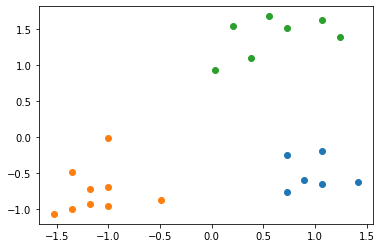

In [79]:
plt.scatter(df1["Age"],df1["Income($)"])
plt.scatter(df2["Age"],df2["Income($)"])
plt.scatter(df3["Age"],df3["Income($)"])